In [1]:
import sys
import os

# moce two directories up and make that current directory
os.chdir("../..")
# print current directory
print(os.getcwd())

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager


In [2]:
from modules.tables.TextTableReader import TextTableReader

tr = TextTableReader(
    "tests/TableTransformer/fm89.pdf",
)

/Users/chinmayshrivastava/Documents/GitHub/RepoStateManager/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/87 [00:00<?, ?it/s]INFO:root:ImageReader initialized.
INFO:root:torch.Size([1, 3, 800, 618])
INFO:root:ImageReader transformed.
  1%|          | 1/87 [00:00<00:12,  7.05it/s]INFO:root:ImageReader initialized.
INFO:root:torch.Size([1, 3, 800, 618])
INFO:root:ImageReader transformed.
  2%|▏         | 2/87 [00:00<00:10,  8.29it/s]INFO:root:ImageReader initialized.
INFO:root:torch.Size([1, 3, 800, 618])
INFO:root:ImageReader transformed.
  3%|▎         | 3/87 [00:00<00:11,  7.14it/s]INFO:root:ImageReader initialized.
INFO:root:torch.Size([1, 3, 800, 618])
INFO:root:ImageReader transformed.
  5%|▍         | 4/87 [00:00<00:11,  7.54it/s]INFO:root:ImageReader initialized.
INFO:roo

In [3]:
tr.pdf_pages

87

In [4]:
tr.extract_all_data()

INFO:root:Extracting tables from page 1...
2024-01-26T18:32:22 - INFO - Processing page-1
INFO:camelot:Processing page-1
INFO:root:Extracting tables from page 2...
2024-01-26T18:32:23 - INFO - Processing page-2
INFO:camelot:Processing page-2
INFO:root:Extracting tables from page 3...
2024-01-26T18:32:25 - INFO - Processing page-3
INFO:camelot:Processing page-3
INFO:root:Extracting tables from page 4...
2024-01-26T18:32:26 - INFO - Processing page-4
INFO:camelot:Processing page-4
INFO:root:Extracting tables from page 5...
2024-01-26T18:32:27 - INFO - Processing page-5
INFO:camelot:Processing page-5
INFO:root:Extracting tables from page 6...
2024-01-26T18:32:28 - INFO - Processing page-6
INFO:camelot:Processing page-6
INFO:root:Extracting tables from page 7...
2024-01-26T18:32:28 - INFO - Processing page-7
INFO:camelot:Processing page-7
INFO:root:Extracting tables from page 8...
2024-01-26T18:32:29 - INFO - Processing page-8
INFO:camelot:Processing page-8
INFO:root:Extracting tables from

[[],
 [],
 [],
 [],
 [],
 [],
 [                                                   0  \
  0  Determine commodity hazard\nusing DS 8-1, then...   
  1                                                      
  2                                                      
  3                                                      
  4                                                      
  5                                                      
  6                                                      
  7                                                      
  8                                                      
  9                                                      
  
                                                     1  \
  0                                                      
  1                                                      
  2                                                      
  3  Follow recs. in Section 2.1\nregarding storage...   
  4                                    

In [5]:
type(tr.tables_by_page_data), len(tr.tables_by_page_data)

(list, 87)

In [6]:
# find the first table that is not empty
for page in range(tr.pdf_pages):
    pg_no = page + 1
    if tr.tables_by_page_data[page]:
        print(f"Page {pg_no} has {len(tr.tables_by_page_data[page])} tables")
        print(f"First table on page {pg_no} has {len(tr.tables_by_page_data[page][0])} rows")
        table = tr.tables_by_page_data[page][0]
        tablestructure = tr.tables_by_page_structure[page][0]
        pg_no = page + 1
        break

Page 7 has 1 tables
First table on page 7 has 10 rows


In [7]:
table

,0,1,2,3,4,5
0,"Determine commodity hazard\nusing DS 8-1, then...",,Is there a\nNo\nprotection option offered\nin ...,,,
1,,,,Follow recs. in Section 2.3.2 to\ndetermine th...,,
2,,,,,,
3,,Follow recs. in Section 2.1\nregarding storage...,,Determine the protection options\navailable us...,,
4,,,,,,
5,,Determine the maximum\nceiling height of the\n...,,,,
6,,,,,,
7,,,,,,
8,,Follow recs.in Section 2.3.1\nregarding genera...,,,,
9,,,,,,


In [9]:
tablestructure.parsing_report

{'accuracy': 99.9, 'whitespace': 88.33, 'order': 1, 'page': 7}

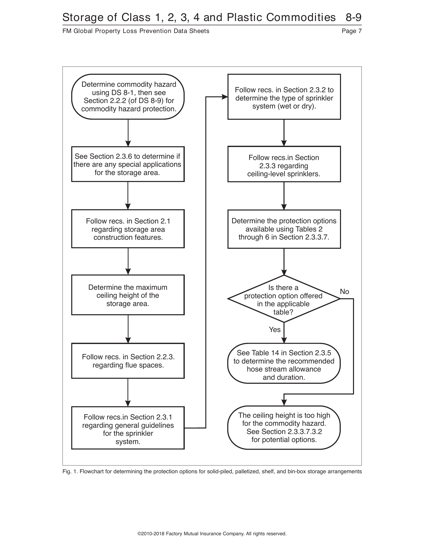

In [24]:
img = tr.pdf_images[page].image
# resize the image to be smaller
img = img.resize((int(img.width/4), int(img.height/4)))
img

In [18]:
print(table.iloc[0, 0])

Determine commodity hazard
using DS 8-1, then see
Section 2.2.2 (of DS 8-9) for
commodity hazard protection.
See Section 2.3.6 to determine if
Follow recs.in Section
there are any special applications
2.3.3 regarding
for the storage area.
ceiling-level sprinklers.
Yes
See Table 14 in Section 2.3.5
Follow recs. in Section 2.2.3.
to determine the recommended
regarding flue spaces.
hose stream allowance
and duration.


In [11]:
i = 0
# get the next not empty table
for page in range(tr.pdf_pages):
    pg_no = page + 1
    if tr.tables_by_page_data[page]:
        print(f"Page {pg_no} has {len(tr.tables_by_page_data[page])} tables")
        print(f"First table on page {pg_no} has {len(tr.tables_by_page_data[page][0])} rows")
        table = tr.tables_by_page_data[page][0]
        tablestructure = tr.tables_by_page_structure[page][0]
        pg_no = page + 1
        i += 1
        if i == 2:
            break

Page 7 has 1 tables
First table on page 7 has 10 rows
Page 15 has 1 tables
First table on page 15 has 11 rows


In [12]:
table

,0,1,2,3,4,5,6,7
0,"Ceiling\nHeight,\nft (m)",Sprinkler\nK-Factor,Sprinkler\nOrientation,Sprinkler\nResponse,"Sprinkler Linear Spacing,\nft\n(m)",,"Sprinkler Area Spacing,\nft2 (m2)",
1,,,,,Min.,Max.,Min.,Max.
2,Up to 30\n(9.0),11.2 (160),Pendent or\nUpright,Quick or\nStandard,8 (2.4),12 (3.6),80 (7.5),100 (9.0)
3,,"14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...",Pendent,Quick or\nStandard,8 (2.4),12 (3.6),64 (6.0),100 (9.0)
4,,,Upright,Quick,8 (2.4),12 (3.6),64 (6.0),100 (9.0)
5,,,,Standard,8 (2.4),12 (3.6),80 (7.5),100 (9.0)
6,,25.2EC\n(360EC),Pendent or\nUpright,Quick,10 (3.0),14 (4.2),100 (9.0),196 (18.0)
7,Over 30\n(9.0),11.2 (160),Pendent or\nUpright,Quick or\nStandard,8 (2.4),10 (3.0),80 (7.5),100 (9.0)
8,,"14.0 (200),\n16.8 (240),\n19.6 (280),\n22.4 (3...",Pendent or\nUpright,Quick,8 (2.4),10 (3.0),64 (6.0),100 (9.0)
9,,,,Standard,8 (2.4),10 (3.0),80 (7.5),100 (9.0)


In [13]:
tablestructure.parsing_report

{'accuracy': 98.3, 'whitespace': 20.45, 'order': 1, 'page': 15}

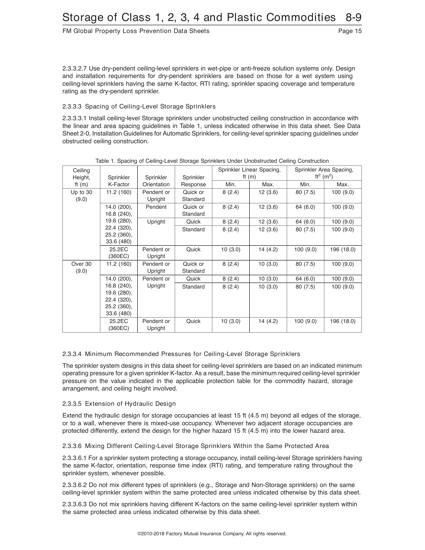

In [14]:
img = tr.pdf_images[page].image
# resize the image to be smaller
img = img.resize((int(img.width/4), int(img.height/4)))
img

In [15]:
# get the next not empty table
i = 0
for page in range(tr.pdf_pages):
    pg_no = page + 1
    if tr.tables_by_page_data[page]:
        print(f"Page {pg_no} has {len(tr.tables_by_page_data[page])} tables")
        print(f"First table on page {pg_no} has {len(tr.tables_by_page_data[page][0])} rows")
        table = tr.tables_by_page_data[page][0]
        tablestructure = tr.tables_by_page_structure[page][0]
        pg_no = page + 1
        i += 1
        if i == 3:
            break

Page 7 has 1 tables
First table on page 7 has 10 rows
Page 15 has 1 tables
First table on page 15 has 11 rows
Page 18 has 1 tables
First table on page 18 has 10 rows


In [16]:
table

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,"Protection of Class 1, 2 and 3 Commodities in ...",,,,,,,,,,...,,,,,,,,,,
1,"Max.\nCeiling\nHeight,\nft (m)","Wet System, Pendent Sprinklers, 160°F (70°C)a",,,,,,,,,...,,,,,,,"Dry System, Upright Sprinklers, 280°F\n(140°C)",,,
2,,Quick Response,,,,,,Standard Response,,,...,,,,Standard Response,,,Standard Response,,,
3,,K11.2\n(K160),K14.0\n(K200),K16.8\n(K240),K22.4\n(K320),K25.2\n(K360),K25.2EC\n(K360EC),K11.2\n(K160),K14.0\n(K200),K19.6\n(K280),...,K14.0\n(K200),K16.8\n(K240),K25.2EC\n(K360EC),K11.2\n(K160),K16.8\n(K240),K25.2\n(K360),K11.2\n(K160),K16.8\n(K240),K19.6\n(K280),K25.2\n(K360)
4,20 (6.0),20 @ 7\n(0.5),12 @\n50 (3.5),12 @\n35 (2.4),12 @\n20 (1.4),12 @\n20 (1.4),6 @ 20\n(1.4),20 @ 7\n(0.5),20 @ 7\n(0.5),12 @\n16 (1.1),...,12 @\n50 (3.5),12 @\n35 (2.4),6 @ 20\n(1.4),20 @ 7\n(0.5),20 @ 7\n(0.5),12 @\n20 (1.4),25 @ 7\n(0.5),25 @ 7\n(0.5),20 @\n30 (2.1),20 @ 7\n(0.5)
5,25 (7.5),20 @ 7\n(0.5),12 @\n50 (3.5),12 @\n35 (2.4),12 @\n20 (1.4),12 @\n20 (1.4),6 @ 20\n(1.4),20 @ 7\n(0.5),20 @ 7\n(0.5),12 @\n16 (1.1),...,12 @\n50 (3.5),12 @\n35 (2.4),6 @ 20\n(1.4),20 @ 7\n(0.5),20 @ 7\n(0.5),12 @\n20 (1.4),25 @ 7\n(0.5),25 @ 7\n(0.5),20 @\n30 (2.1),20 @ 7\n(0.5)
6,30 (9.0),20 @ 7\n(0.5),12 @\n50 (3.5),12 @\n35 (2.4),12 @\n20 (1.4),12 @\n20 (1.4),6 @ 25\n(1.7),20 @ 7\n(0.5),20 @ 7\n(0.5),12 @\n16 (1.1),...,12 @\n50 (3.5),12 @\n35 (2.4),6 @ 25\n(1.7),20 @ 7\n(0.5),20 @ 7\n(0.5),12 @\n20 (1.4),25 @ 7\n(0.5),25 @ 7\n(0.5),20 @\n30 (2.1),20 @ 7\n(0.5)
7,35\n(10.5),15 @\n25 (1.7),12 @\n75 (5.2),12 @\n50 (3.5),12 @\n30 (2.1),12 @\n30 (2.1),6 @ 60\n(4.1)b,15 @\n25 (1.7),15 @\n15 (1.0),15 @\n16 (1.1),...,12 @\n75 (5.2),12 @\n50 (3.5),8 @ 40\n(2.8)c,15 @\n25 (1.7),15 @\n10 (0.7),15 @ 7\n(0.5),See Section 2.3.6.1,,,
8,40\n(12.0),,12 @\n75 (5.2),12 @\n50 (3.5),12 @\n40 (2.8),12 @\n40 (2.8),,,,,...,,,,,,,,,,
9,45\n(13.5),,12 @\n90 (6.2),12 @\n65 (4.5),12 @\n50 (3.5),12 @\n50 (3.5),,,,,...,,,,,,,,,,


In [17]:
tablestructure.parsing_report

{'accuracy': 97.34, 'whitespace': 42.27, 'order': 1, 'page': 18}

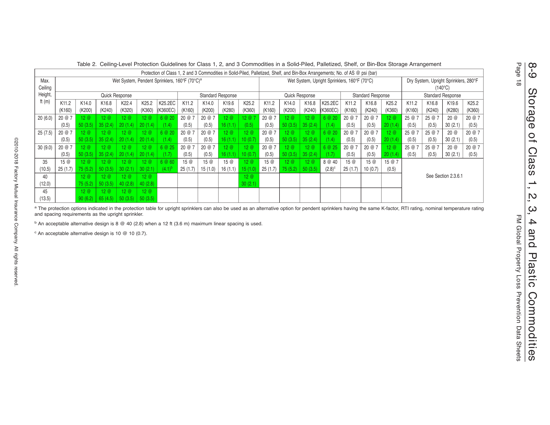

In [18]:
img = tr.pdf_images[page].image
# resize the image to be smaller
img = img.resize((int(img.width/4), int(img.height/4)))
img

In [19]:
# get the next not empty table
i = 0
for page in range(tr.pdf_pages):
    pg_no = page + 1
    if tr.tables_by_page_data[page]:
        print(f"Page {pg_no} has {len(tr.tables_by_page_data[page])} tables")
        print(f"First table on page {pg_no} has {len(tr.tables_by_page_data[page][0])} rows")
        table = tr.tables_by_page_data[page][0]
        tablestructure = tr.tables_by_page_structure[page][0]
        pg_no = page + 1
        i += 1
        if i == 4:
            break

Page 7 has 1 tables
First table on page 7 has 10 rows
Page 15 has 1 tables
First table on page 15 has 11 rows
Page 18 has 1 tables
First table on page 18 has 10 rows
Page 19 has 1 tables
First table on page 19 has 11 rows


In [20]:
table

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Protection of Class 4 and Cartoned Unexpanded ...,,,,,,,,,,...,,,,,,,,,,
1,"Max.\nCeiling\nHeight,\nft\n(m)","Wet System, Pendent Sprinklers, 160°F (70°C)",,,,,,,,,...,,,,,,,"Dry System, Upright\nSprinklers, 280°F (140°C)",,,
2,,Quick Response,,,,,,Standard Response,,,...,,,,Standard Response,,,Standard Response,,,
3,,K11.2\n(K160),K14.0\n(K200),K16.8\n(K240),K22.4\n(K320),K25.2\n(K360),K25.2EC\n(K360EC),K11.2\n(K160),K14.0\n(K200),K19.6\n(K280),...,K14.0\n(K200),K16.8\n(K240),K25.2EC\n(K360EC),K11.2\n(K160),K16.8\n(K240),K25.2\n(K360),K11.2\n(K160),K16.8\n(K240),K19.6\n(K280),K25.2\n(K360)
4,15 (4.5),20 @ 7\n(0.5),12 @\n50 (3.5),12 @\n35 (2.4),12 @\n20 (1.4),12 @\n20 (1.4),6 @ 20\n(1.4),20 @ 7\n(0.5),20 @ 7\n(0.5),12 @\n16 (1.1),...,12 @\n50 (3.5),12 @\n35 (2.4),6 @ 20\n(1.4),20 @ 7\n(0.5),20 @ 7\n(0.5),12 @\n20 (1.4),25 @ 7\n(0.5),25 @ 7\n(0.5),20 @\n30 (2.1),20 @ 7\n(0.5)
5,20 (6.0),15 @\n25 (1.7),12 @\n50 (3.5),12 @\n35 (2.4),12 @\n20 (1.4),12 @\n20 (1.4),6 @ 20\n(1.4),15 @\n25 (1.7),15 @\n15 (1.0),12 @\n16 (1.1),...,12 @\n50 (3.5),12 @\n35 (2.4),6 @ 20\n(1.4),15 @\n25 (1.7),15 @\n15 (1.0),12 @\n20 (1.4),20 @\n25 (1.7),20 @\n15 (1.0),20 @\n30 (2.1),20 @ 7\n(0.5)
6,25 (7.5),15 @\n50 (3.5),12 @\n50 (3.5),12 @\n35 (2.4),12 @\n20 (1.4),12 @\n20 (1.4),6 @ 20\n(1.4),15 @\n50 (3.5),15 @\n35 (2.4),12 @\n16 (1.1),...,12 @\n50 (3.5),12 @\n35 (2.4),6 @ 20\n(1.4),15 @\n50 (3.5),15 @\n22 (1.5),12 @\n20 (1.4),20 @\n50 (3.5),20 @\n22 (1.5),20 @\n30 (2.1),20 @\n10 (0.7)
7,30 (9.0),20 @\n50 (3.5),12 @\n50 (3.5),12 @\n35 (2.4),12 @\n20 (1.4),12 @\n20 (1.4),6 @ 25\n(1.7),20 @\n50 (3.5),20 @\n35 (2.4),12 @\n16 (1.1),...,12 @\n50 (3.5),12 @\n35 (2.4),6 @ 25\n(1.7),20 @\n50 (3.5),20 @\n22 (1.5),12 @\n20 (1.4),25 @\n50 (3.5),25 @\n22 (1.5),25 @\n30 (2.1),25 @\n10 (0.7)
8,35\n(10.5),,12 @\n75 (5.2),12 @\n50 (3.5),12 @\n30 (2.1),12 @\n30 (2.1),6 @ 60\n(4.1)a,,,15 @\n25 (1.7),...,12 @\n75 (5.2),12 @\n50 (3.5),8 @ 40\n(2.8),,,,,,,
9,40\n(12.0),,12 @\n75 (5.2),12 @\n50 (3.5),12 @\n40 (2.8),12 @\n40 (2.8),,,,,...,,,,,,,,,,


In [21]:
tablestructure.parsing_report

{'accuracy': 97.41, 'whitespace': 41.74, 'order': 1, 'page': 19}

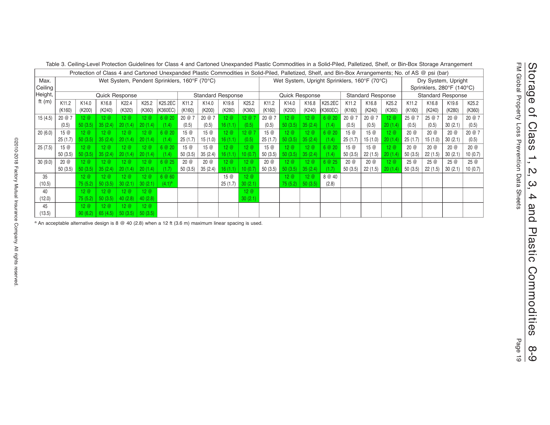

In [22]:
img = tr.pdf_images[page].image
# resize the image to be smaller
img = img.resize((int(img.width/4), int(img.height/4)))
img

In [120]:
tables_structure = []
for tables in tr.tables_by_page_structure:
    for table in tables:
        tables_structure.append(table)
tables_structure

[<Table shape=(10, 6)>,
 <Table shape=(11, 8)>,
 <Table shape=(10, 22)>,
 <Table shape=(11, 22)>,
 <Table shape=(11, 22)>,
 <Table shape=(12, 22)>,
 <Table shape=(11, 22)>,
 <Table shape=(10, 22)>,
 <Table shape=(11, 22)>,
 <Table shape=(10, 22)>,
 <Table shape=(14, 22)>,
 <Table shape=(14, 22)>,
 <Table shape=(2, 2)>,
 <Table shape=(5, 5)>,
 <Table shape=(29, 5)>,
 <Table shape=(3, 3)>,
 <Table shape=(3, 3)>,
 <Table shape=(7, 4)>,
 <Table shape=(14, 8)>,
 <Table shape=(12, 8)>,
 <Table shape=(8, 3)>,
 <Table shape=(5, 4)>,
 <Table shape=(6, 3)>,
 <Table shape=(7, 4)>,
 <Table shape=(8, 2)>,
 <Table shape=(5, 11)>,
 <Table shape=(16, 2)>,
 <Table shape=(3, 9)>,
 <Table shape=(3, 17)>,
 <Table shape=(11, 13)>,
 <Table shape=(11, 14)>,
 <Table shape=(10, 11)>,
 <Table shape=(5, 3)>]

In [121]:
# order the tables by parsing report.whitespace
tables_structure.sort(key=lambda x: x.parsing_report['whitespace'])
tables_structure

[<Table shape=(2, 2)>,
 <Table shape=(8, 2)>,
 <Table shape=(16, 2)>,
 <Table shape=(5, 3)>,
 <Table shape=(8, 3)>,
 <Table shape=(5, 4)>,
 <Table shape=(6, 3)>,
 <Table shape=(7, 4)>,
 <Table shape=(5, 5)>,
 <Table shape=(7, 4)>,
 <Table shape=(11, 8)>,
 <Table shape=(12, 8)>,
 <Table shape=(14, 8)>,
 <Table shape=(11, 22)>,
 <Table shape=(12, 22)>,
 <Table shape=(11, 22)>,
 <Table shape=(29, 5)>,
 <Table shape=(10, 22)>,
 <Table shape=(11, 22)>,
 <Table shape=(10, 22)>,
 <Table shape=(14, 22)>,
 <Table shape=(11, 22)>,
 <Table shape=(14, 22)>,
 <Table shape=(10, 22)>,
 <Table shape=(10, 6)>,
 <Table shape=(3, 3)>,
 <Table shape=(3, 3)>,
 <Table shape=(5, 11)>,
 <Table shape=(3, 9)>,
 <Table shape=(3, 17)>,
 <Table shape=(11, 13)>,
 <Table shape=(11, 14)>,
 <Table shape=(10, 11)>]

In [130]:
def next_table_generator(tables):
    for table in tables:
        yield table
tg = next_table_generator(tables_structure)
i = -1

24
{'accuracy': 99.9, 'whitespace': 88.33, 'order': 1, 'page': 7}


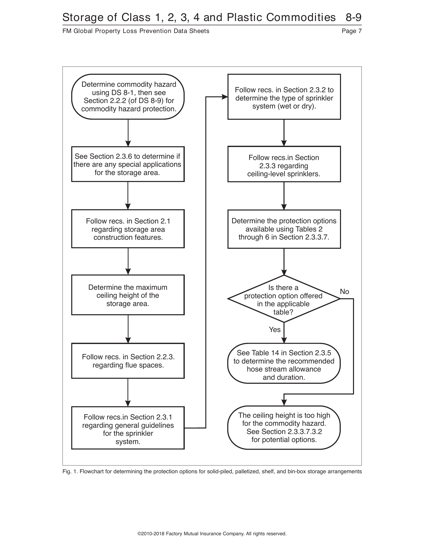

In [155]:
table = next(tg)
i += 1
page = table.parsing_report['page']
img = tr.pdf_images[page-1].image
# resize the image to be smaller
img = img.resize((int(img.width/4), int(img.height/4)))
print(i)
print(table.parsing_report)
img

{'accuracy': 96.81, 'whitespace': 50.91, 'order': 1, 'page': 25}


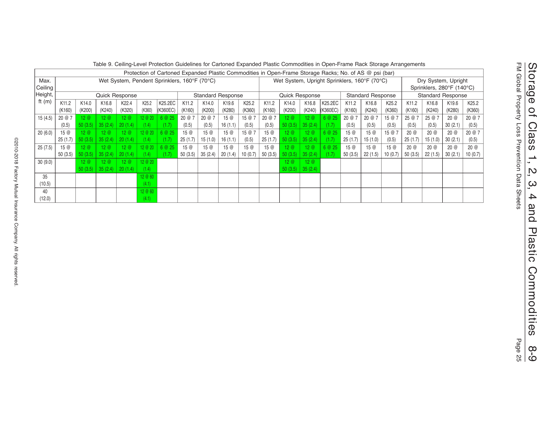

In [162]:
# get img number 23
table = tables_structure[23]
print(table.parsing_report)
pg = tables_structure[23].parsing_report['page']
img = tr.pdf_images[pg-1].image
# resize the image to be smaller
img = img.resize((int(img.width/4), int(img.height/4)))
img

In [115]:
table.df

,0,1
0,Number of Sprinklers that Operate During a Fire,Percentage of Fires Controlled
1,1,14%
2,2 or\nfewer,32%
3,3 or\nfewer,41%
4,4 or\nfewer,49%
5,5 or\nfewer,54%
6,10 or\nfewer,77%
7,25 or\nfewer,98%


In [128]:
table.parsing_report

{'accuracy': 100.0, 'whitespace': 0.0, 'order': 1, 'page': 67}

In [81]:
len(tables_structure)

33

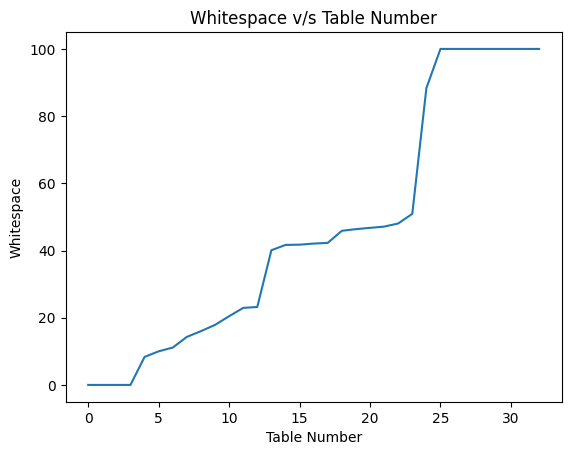

In [82]:
# plot graph of table number v/s whitespace
import matplotlib.pyplot as plt
import numpy as np
whitespace = [table.parsing_report['whitespace'] for table in tables_structure]
plt.plot(np.arange(len(whitespace)), whitespace)
plt.xlabel('Table Number')
plt.ylabel('Whitespace')
plt.title('Whitespace v/s Table Number')
plt.show()